## Algoritmo de Aprendizaje No Supervisado
## Modelo de K-means

In [1072]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [1074]:
# Cargar el data set para analizarlo y ajustarlo
df = pd.read_csv('./Mall_Customers.csv')

## Análisis Exploratorio de Datos

In [1076]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Hay 5 variables
CustomerID, Gender, Age, Annual Income (k$) y Spending Score (1-100)


In [1078]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1080]:
# Información sobre tipos de datos y valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


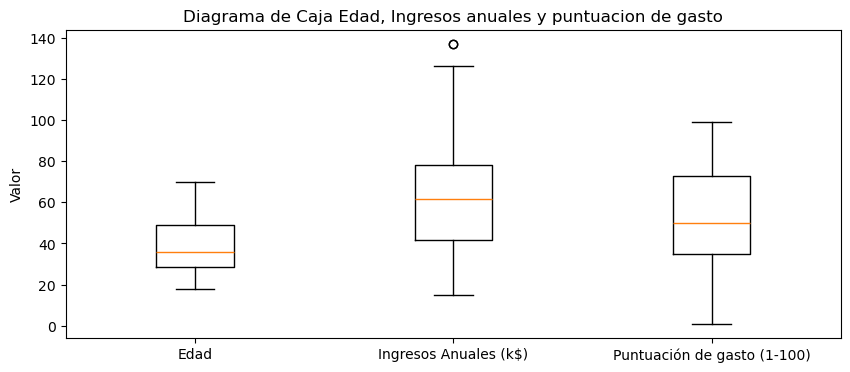

In [1082]:
#Identificación de Datos Faltantes (No hay) y Atípicos
# Diagramas de caja para detectar valores atípicos para variables entre 0 y 16
plt.figure(figsize=(10, 4))
plt.boxplot([df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']], 
        labels=['Edad', 'Ingresos Anuales (k$)', 'Puntuación de gasto (1-100)'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja Edad, Ingresos anuales y puntuacion de gasto')
plt.show()

Solo muestra valores atípicos en Ingresos anuales, para lo cual se realizó el gráfico de cajas solo para los ingresos anuales

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [1084]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [1086]:
# Se verifica la existencia de registros duplicados
print(f' Cantidad de registros duplicados es: ', df.duplicated().sum())

 Cantidad de registros duplicados es:  0


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para este modelo se utilizarán las características de:
Age (Edad)
Annual Income (k$) (Ingresos anuales) 
Spending Score (1-100) (Puntuación de Gasto)

In [1088]:
# Elimino o filtro las columnas a trabajar
df_filtrado = df.drop(['Gender', 'CustomerID'], axis=1)

In [1090]:
# Verifico las variables a trabajar en el modelo
df_filtrado.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [1092]:
# Identifico relaciones entre las variables
print(df_filtrado.corr())

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


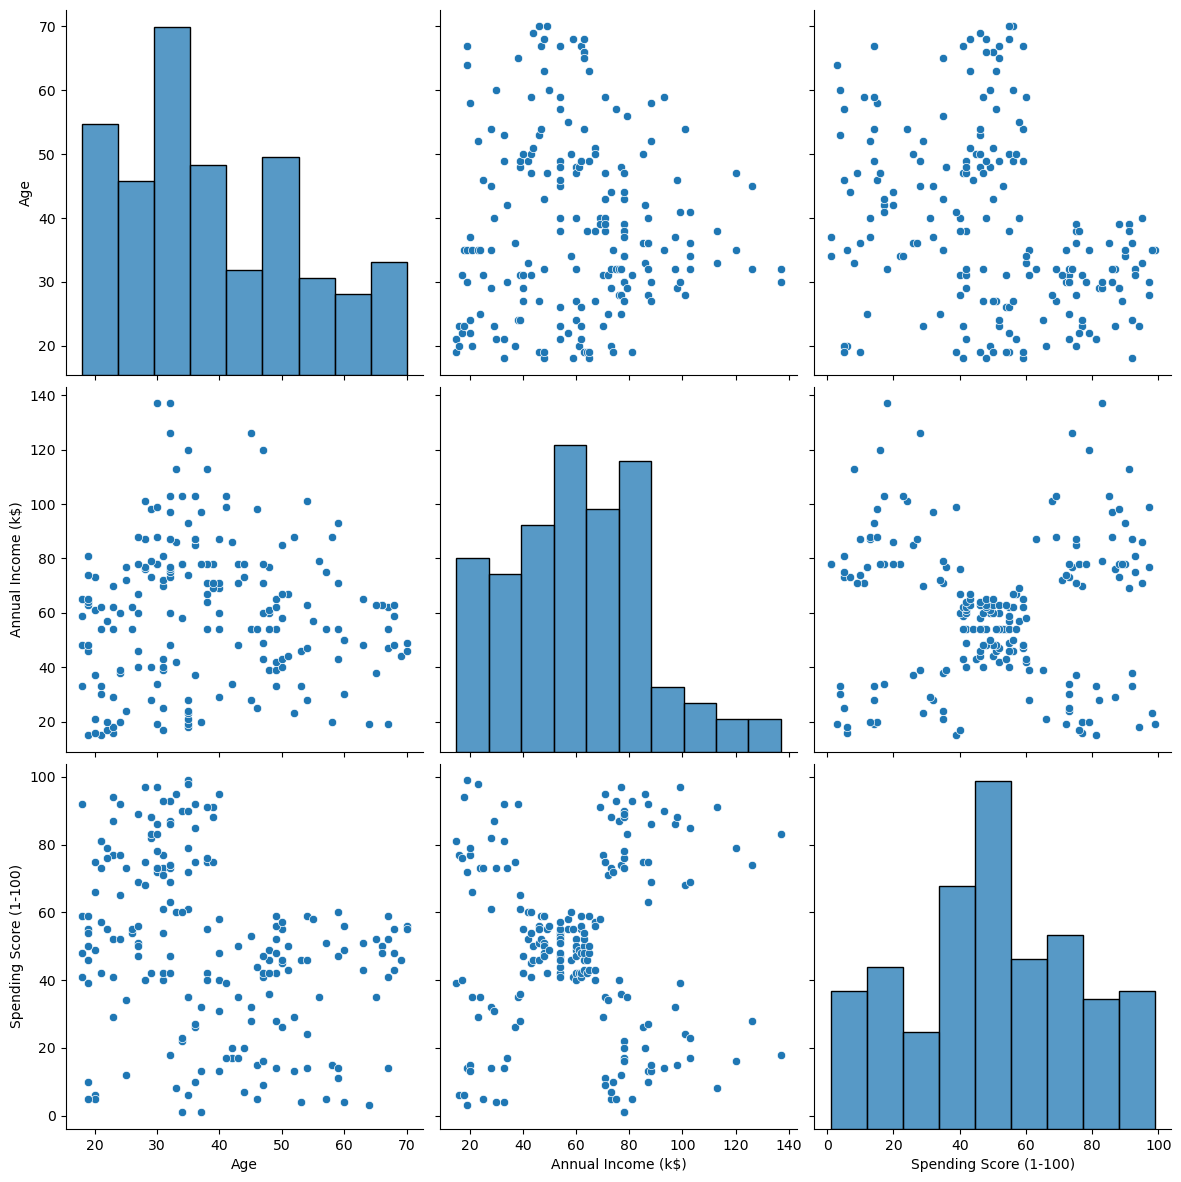

In [1094]:
# Grafico esas relaciones
sns.pairplot(df_filtrado, size=4, kind='scatter')

## 4. Entrenar el modelo - Aplicar K-Means


In [351]:
# Determinar el número de clusters a utilizar mediante el gráfico de codo

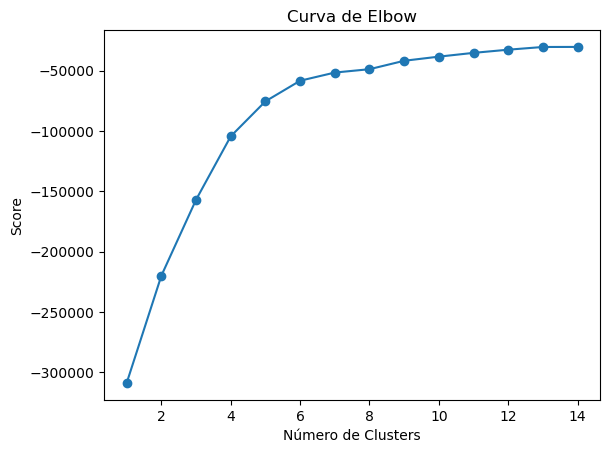

In [1096]:
NumClust = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in NumClust]
kmeans
score = [kmeans[i].fit(df_filtrado).score(df_filtrado) for i in range(len(kmeans))]
score
plt.plot(NumClust, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de Elbow')
plt.show()

In [1157]:
# Se identifica la curva con el cambio optimo hasta el número 5 al 8 de clusters, 
# por eso se entrena el modelo con estos números de cluster para evaluar cual es mejor 

In [1130]:
# Lista de valores para n_clusters
n_clusters_list = [5, 6, 7, 8]

# Lista para almacenar los resultados
resultados = []

# Se inicializan variables
mejorModeloK = None
mejorSilueta = 0

# Ciclo para evaluar el modelo con diferentes valores de clúster
for i in n_clusters_list:
    modeloK = KMeans(n_clusters=i, random_state=0)
    modeloK.fit(df_filtrado)
    df_filtrado["Categoria"] = modeloK.labels_
    
    Observaciones = len(df_filtrado)
    X = df_filtrado.drop('Categoria', axis=1)
    clusters = df_filtrado['Categoria']
    
    # Calcular medidas de calidad para K-Means
    puntaje_silueta = metrics.silhouette_score(X, clusters)
    indice_calinski_harabasz = metrics.calinski_harabasz_score(X, clusters)
    indice_davies_bouldin = metrics.davies_bouldin_score(X, clusters)

    # Condicional para elegir mejor número de clusters
    if puntaje_silueta > mejorSilueta:
        mejorModeloK = modeloK
        mejorSilueta = puntaje_silueta
    
    # Guardar los resultados en la lista
    resultados.append({
        'Clusters': i,
        'Silhouette': puntaje_silueta,
        'Calinski-Harabasz': indice_calinski_harabasz,
        'Davies-Bouldin': indice_davies_bouldin
    })

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar la tabla de resultados
print(resultados_df)

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         5    0.374685         132.907168        0.972293
1         6    0.450951         166.585711        0.751533
2         7    0.437513         160.602722        0.830779
3         8    0.426275         163.591968        0.863855


De acuerdo a los resultados, el mejor modelo es con 6 clusters

In [1132]:
mejorModeloK.labels_
df_filtrado["Categoria"] = mejorModeloK.labels_ 
print (df_filtrado)

     Age  Annual Income (k$)  Spending Score (1-100)  Categoria
0     19                  15                      39          5
1     21                  15                      81          2
2     20                  16                       6          5
3     23                  16                      77          2
4     31                  17                      40          5
..   ...                 ...                     ...        ...
195   35                 120                      79          1
196   45                 126                      28          3
197   32                 126                      74          1
198   32                 137                      18          3
199   30                 137                      83          1

[200 rows x 4 columns]


## Evaluar el modelo

In [1134]:
# Preparación de la metrica de la columna Grupo
Observaciones = len(df_filtrado)
X = df_filtrado.drop('Categoria', axis=1)
clusters = df_filtrado['Categoria']

# Calcular medidas de calidad para K-Means
print('Medidas de calidad para K-Means:')
print('Número de observaciones: ', len(df))
print('Puntaje de silueta; ', metrics.silhouette_score(X, clusters))
print('Índice de Calinski-Harabasz: ', metrics.calinski_harabasz_score(X, clusters))
print('Indice de Davies-Bouldin: ', metrics.davies_bouldin_score(X, clusters)) 

Medidas de calidad para K-Means:
Número de observaciones:  200
Puntaje de silueta;  0.45095124469943243
Índice de Calinski-Harabasz:  166.5857109469557
Indice de Davies-Bouldin:  0.7515325100425706


## Realizar las gráficas que visualizan los resultados del modelo

In [1180]:
# Obtener las coordenadas de los centroides
C = mejorModeloK.cluster_centers_

In [1182]:
print(C)

[[56.34090909 53.70454545 49.38636364  0.90909091]
 [32.69230769 86.53846154 82.12820513  1.        ]
 [25.52173913 26.30434783 78.56521739  2.        ]
 [41.64705882 88.73529412 16.76470588  3.        ]
 [27.31578947 57.5        48.44736842  4.        ]
 [44.31818182 25.77272727 20.27272727  0.09090909]]


Grafico cada una de las posibles relaciones para verificar su agrupamiento

In [1172]:
# Función para los colores de los centroides
def colorCentroides(df, centers, scatter):
    
    # Obtener el colormap 'viridis'
    cmap = plt.cm.get_cmap('viridis')

    # Obtener los colores únicos de las categorías
    cu = df_filtrado['Categoria'].unique()
    colores = [cmap(i / len(cu)) for i in range(len(cu))]

    # Crear el scatter plot para los centros usando los colores del colormap
    for i, centro in enumerate(C):
        plt.scatter(centro[0], centro[1], marker='+', color=colores[i], s=100)

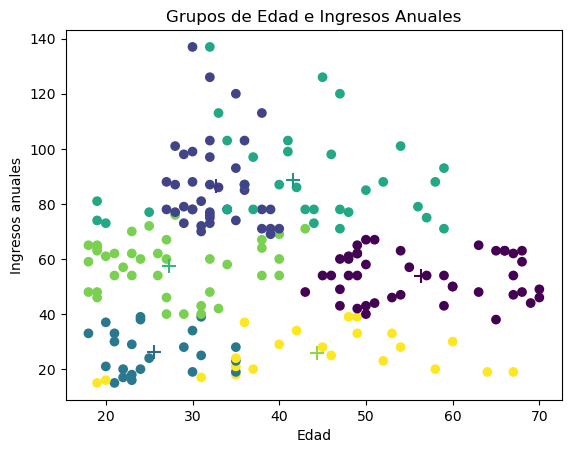

In [1174]:
# Crear el scatter plot para los puntos
scatter = plt.scatter(df_filtrado['Age'], df_filtrado['Annual Income (k$)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.title('Grupos de Edad e Ingresos Anuales')
plt.show()

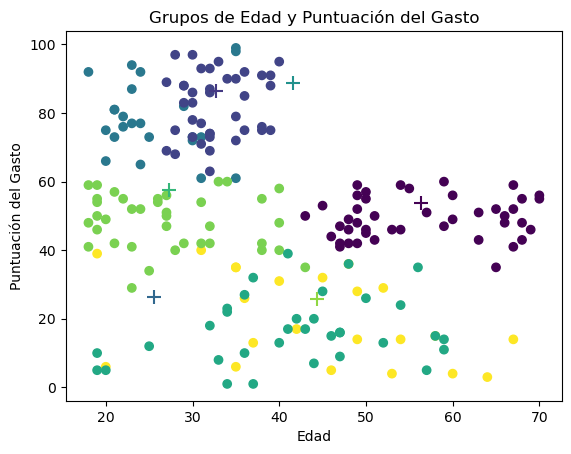

In [1176]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Age'], df_filtrado['Spending Score (1-100)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Edad y Puntuación del Gasto')
plt.show()

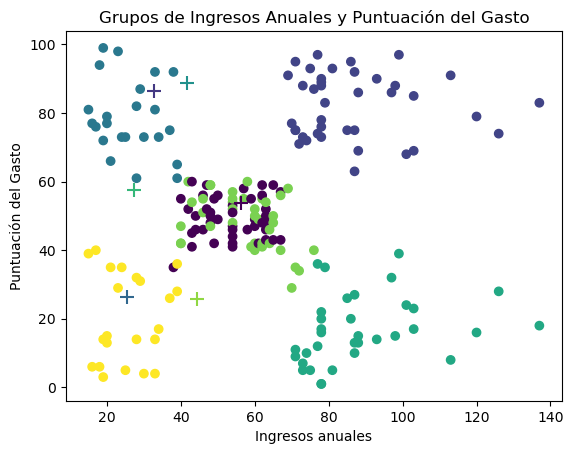

In [1178]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Annual Income (k$)'], df_filtrado['Spending Score (1-100)'], c=df_filtrado['Categoria'], cmap='viridis')

# Llamamos la función para asignar colores a los centroides
colorCentroides(df_filtrado, C, scatter)

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Ingresos Anuales y Puntuación del Gasto')
plt.show()

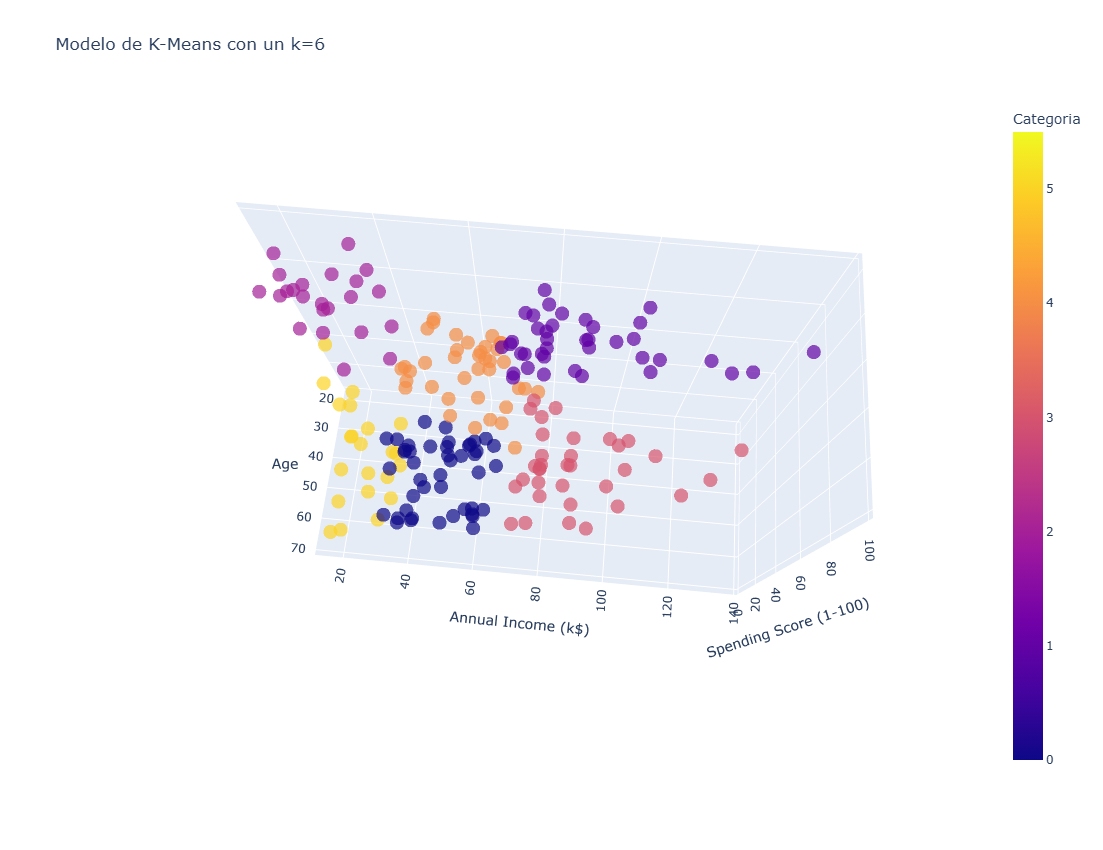

In [1146]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(df_filtrado, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Categoria', symbol='Categoria', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

# Interpretación de resultados

De acuerdo con los resultados, el mejor modelo es aquel en el que se utilizan 6 clusters, ya que es el que mejor resultado de Coeficiente de Silhouette arroja, siendo su puntuación 0,45 lo cual nos indica que los puntos se encuentran razonablemente bien agrupados, pero no es óptima esa agrupación, ya que puede presentarse superposición entre grupos, pero para el modelo fue el mejor resultado.
En cuanto al índice de Calinski-Harabasz, el valor más alto fue 166,58 lo cual indica que en este modelo comparado con los otros 3, es el que mejor separación entre los clústeres y mejor cohesión dentro los mismos tiene, por lo tanto, es donde están mejor definidos los clústeres.
Finalmente, para el índice de Davies Bouldin, que también sirve para evaluar la calidad de un agrupamiento del modelo, esta métrica nos da un valor de 0,75 que al compararlo con los otros resultados es la mejor, en este caso es la menor, lo cual corrobora los resultados anteriores, mostrando que el agrupamiento en 6 clústeres fue la mejor opción, que nos da resultados aceptables para aplicar acciones sobre los grupos creados.
